This notebook provides an introduction to LangGraph, focusing on its core concepts and usage. The following topics will be covered:

- `graph()`: Creating and managing graphs
- `state`: Understanding and manipulating state within LangGraph
- `edges`: Defining and working with edges in a graph
- `nodes`: Creating and connecting nodes
- `invoke`: Executing graph operations
- `stategraph()`: Advanced state management with state graphs

By the end of this notebook, you will have a foundational understanding of how to use LangGraph for building and managing graph-based workflows.

## Example of a Simple Graph using Langgraph

In [13]:
def function1(input1):
    return input1 + " from first function"

def function2(input2):
    return input2 + " -  Inoput processed by second function"

def function3(input3):
    pass

In [14]:
print(function1("Nahil"))
print(function2("Nahil Ahmed"))

Nahil from first function
Nahil Ahmed -  Inoput processed by second function


LangChain provides two types of graphs: **Normal Graph** and **State Graph**. In this section, we are focusing on the Normal Graph. The State Graph will be covered later in the notebook.

In [15]:
from langgraph.graph import Graph

workflow1 = Graph()

In [16]:
workflow1.add_node("fun1",function1)
workflow1.add_node("fun2", function2)

In [17]:
workflow1.add_edge("fun1","fun2")

In [18]:
workflow1.set_entry_point("fun1")
workflow1.set_finish_point("fun2")

In [19]:
app = workflow1.compile()

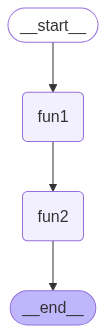

In [20]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
app.invoke("Hi Hani")

'Hi Hani from first function -  Inoput processed by second function'

In [22]:
for output in app.stream("Hi Hani"):
    for key,value in output.items():
        print(f"Output from {key}")
        print("_______")
        print(value)
        print("\n")

Output from fun1
_______
Hi Hani from first function


Output from fun2
_______
Hi Hani from first function -  Inoput processed by second function




## Example of Simple Graph with Tools

In [37]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
load_dotenv()

True

In [34]:
# Set environment variables for OpenAI
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY", "")

# Set environment variables for LangChain
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY", "")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT", "")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

# Set environment variables for Groq
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY", "")

In [53]:
from collections import Counter

def my_llm(input):
    llm = ChatOpenAI(
        model="gpt-4o",
        temperature=0.0,
    )
    output = llm.invoke(input)
    return output.content

def token_counter(input):
    char_count = len(input)
    return f"Token for the generated answer is: {char_count}"

In [54]:
workflow2 = Graph()

workflow2.add_node("my_llm", my_llm)
workflow2.add_node("token_counter", token_counter)

In [55]:
workflow2.add_edge("my_llm", "token_counter")
workflow2.set_entry_point("my_llm")
workflow2.set_finish_point("token_counter")

In [56]:
app2 = workflow2.compile()

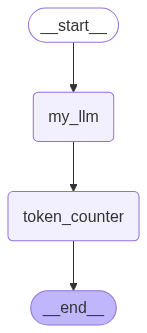

In [57]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [58]:
app2.invoke("What is the capital of France?")

'Token for the generated answer is: 31'

In [59]:
app2.invoke("What is the capital of France?")
for output in app2.stream("What is the capital of France?"):
    for key, value in output.items():
        print(f"Output from {key}")
        print("_______")
        print(value)
        print("\n")

Output from my_llm
_______
The capital of France is Paris.


Output from token_counter
_______
Token for the generated answer is: 31


